# Analysis in a heart beat
- Used the fitbit API to collect personal sleep data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import datetime

%matplotlib inline

In [2]:
# define function to read HR files and add date
def read_HRfiles(path):
    dflist = []
    my_dir = os.listdir(path)
    csvs = [d for d in my_dir if d[-4:] == '.csv']
    for c in csvs:
        df = pd.read_csv(path+c, index_col=None, header=0)
        df['Date'] = '{}-{}-{}'.format(c[-12:-8], c[-8:-6], c[-6:-4])
        year, month, day = int(c[-12:-8]), int(c[-8:-6]), int(c[-6:-4])
        df['year'] = year
        df['month'] = month
        df['day'] = day
        df['DOW'] = datetime.date(year, month, day).strftime('%A')
        df['DOW'] = pd.Categorical(df['DOW'],
                                  categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                              'Friday', 'Saturday', 'Sunday'],
                                  ordered=True)
        dflist.append(df)
    df_all = pd.concat(dflist)
    return df_all

In [18]:
HR_df = read_HRfiles('/Users/dannie/Documents/programming/github/dannie1g/fitbit/python-fitbit/downloads/heart/')

In [19]:
HR_df.head()

,Time,Heart Rate,Date,year,month,day,DOW
0,00:00:00,50,2018-04-17,2018,4,17,Tuesday
1,00:00:03,56,2018-04-17,2018,4,17,Tuesday
2,00:00:04,56,2018-04-17,2018,4,17,Tuesday
3,00:00:07,56,2018-04-17,2018,4,17,Tuesday
4,00:00:10,56,2018-04-17,2018,4,17,Tuesday


In [20]:
HR_df['Date_Time'] = HR_df[['Date', 'Time']].apply(lambda x: ' '.join(x), axis=1)

In [21]:
HR_df.head()

,Time,Heart Rate,Date,year,month,day,DOW,Date_Time
0,00:00:00,50,2018-04-17,2018,4,17,Tuesday,2018-04-17 00:00:00
1,00:00:03,56,2018-04-17,2018,4,17,Tuesday,2018-04-17 00:00:03
2,00:00:04,56,2018-04-17,2018,4,17,Tuesday,2018-04-17 00:00:04
3,00:00:07,56,2018-04-17,2018,4,17,Tuesday,2018-04-17 00:00:07
4,00:00:10,56,2018-04-17,2018,4,17,Tuesday,2018-04-17 00:00:10


In [22]:
HR_df.shape

(955589, 8)

In [23]:
HR_timegrouped_df = HR_df.groupby('Time').mean()

In [24]:
HR_timegrouped_df.head()

,Heart Rate,year,month,day
Time,,,,
00:00:00,52.000000,2018.0,4.272727,18.363636
00:00:01,48.888889,2018.0,4.444444,12.555556
00:00:02,48.111111,2018.0,4.333333,18.000000
00:00:03,51.250000,2018.0,4.250000,18.000000
00:00:04,50.000000,2018.0,4.222222,16.444444


In [25]:
HR_timegrouped_df = HR_timegrouped_df.reset_index()

In [26]:
HR_timegrouped_df.head()

,Time,Heart Rate,year,month,day
0,00:00:00,52.000000,2018.0,4.272727,18.363636
1,00:00:01,48.888889,2018.0,4.444444,12.555556
2,00:00:02,48.111111,2018.0,4.333333,18.000000
3,00:00:03,51.250000,2018.0,4.250000,18.000000
4,00:00:04,50.000000,2018.0,4.222222,16.444444


In [27]:
HR_timegrouped_df.shape

(86340, 5)

In [50]:
sampled_HR_timegrouped_df = HR_timegrouped_df[HR_timegrouped_df.index % 300 == 0]

In [51]:
sampled_HR_timegrouped_df.shape

(288, 5)

In [52]:
sampled_HR_timegrouped_df = sampled_HR_timegrouped_df.drop(['year', 'month', 'day'], axis=1)

In [53]:
sampled_HR_timegrouped_df.head(10)

,Time,Heart Rate
0,00:00:00,52.000000
300,00:05:00,49.750000
600,00:10:00,50.400000
900,00:15:00,50.555556
1200,00:20:00,47.750000
1500,00:25:00,48.363636
1800,00:30:00,50.250000
2100,00:35:00,50.000000
2400,00:40:00,49.187500
2700,00:45:00,50.769231


In [54]:
sampled_HR_timegrouped_df.shape

(288, 2)

In [18]:
#sampled_HR_timegrouped_df['Time'] = pd.to_datetime(sampled_HR_timegrouped_df['Time'], format='%H:%M:%S').dt.time

In [29]:
sampled_HR_timegrouped_df.dtypes

Time           object
Heart Rate    float64
dtype: object

In [81]:
sampled_HR_timegrouped_df.head(20)

,Time,Heart Rate
0,00:00:00,52.000000
300,00:05:00,49.750000
600,00:10:00,50.400000
900,00:15:00,50.555556
1200,00:20:00,47.750000
1500,00:25:00,48.363636
1800,00:30:00,50.250000
2100,00:35:00,50.000000
2400,00:40:00,49.187500
2700,00:45:00,50.769231


In [82]:
hoursampled_HR_timegrouped_df = HR_timegrouped_df[HR_timegrouped_df.index % 3600 == 0]

In [84]:
hoursampled_HR_timegrouped_df

,Time,Heart Rate,year,month,day
0,00:00:00,52.000000,2018.0,4.272727,18.363636
3600,01:00:00,49.444444,2018.0,4.444444,15.333333
7200,02:00:00,50.777778,2018.0,4.444444,15.555556
10800,03:00:00,52.181818,2018.0,4.272727,17.545455
14400,04:00:00,50.700000,2018.0,4.300000,16.500000
18000,05:00:00,52.090909,2018.0,4.272727,17.181818
21600,06:00:00,53.555556,2018.0,4.666667,10.666667
25200,07:00:00,71.750000,2018.0,4.333333,15.416667
28800,08:00:00,74.700000,2018.0,4.400000,15.800000
32400,09:00:00,84.400000,2018.0,4.400000,13.400000


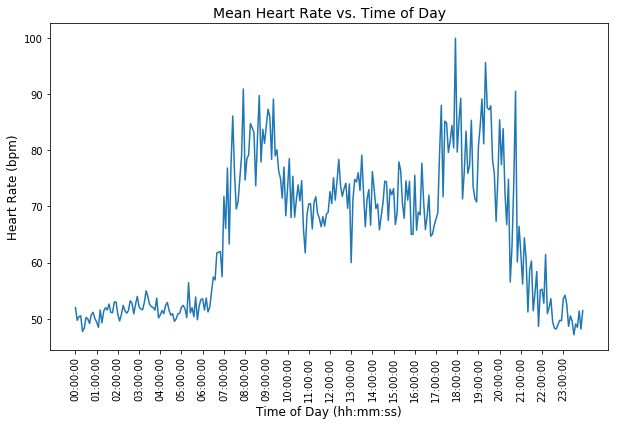

In [88]:
# plot chart
x = sampled_HR_timegrouped_df['Time']
y = sampled_HR_timegrouped_df['Heart Rate']

fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(x, y)

plt.title('Mean Heart Rate vs. Time of Day', fontsize=14)
plt.xlabel('Time of Day (hh:mm:ss)', fontsize=12)
plt.ylabel('Heart Rate (bpm)', fontsize=12)

xlabels = hoursampled_HR_timegrouped_df['Time']
ax.set_xticks(range(0, 288, 12))
ax.set_xticklabels(xlabels, rotation=90)

plt.show()